# Домашнее задание №2 - Линейные модели. Градиентный спуск

В этом домашнем задании мы с вами научимся обучать линейные модели регрессии и классификации при помощи очень мощного, но в то же время довольно понятного алгоритма, который называется **градиетный спуск**. Помимо линейных моделей он используется и для обучения самых сложных нейронных сетей! Также мы потренируемся применять готовые реализации линейных моделей для задач регрессии и бинарной классификации.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import pandas as pd

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.exceptions import NotFittedError
from sklearn.linear_model import (LinearRegression,
                                  LogisticRegression)
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import (r2_score,
                             mean_squared_error)
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams["figure.figsize"] = 12, 9
sns.set_style("whitegrid")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

#### Маленькое теоретическое отступление

Основное свойство антиградиента (-1 * градиент) &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента, пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (коэффициентов линейной модели) ((например, нулевой или сгенерированный из некоторого, случайного распределения)). Тогда обычный градиентный спуск состоит в повторении следующих шагов до сходимости:


$$
    w_{k + 1} = w_{k} - \eta \nabla_{w} Q(w_{k}),
$$

где $\nabla_{w} Q(w_{k})$ &ndash; градиент функции потерь в точке $w_k$, а $\eta$ &ndash; скорость обучения (learning rate).

Градиентный спуск обычно останавливают, когда прошло заданное максимальное количество итераций или когда графиент близок к нулю (т.е. наши параметры практически не меняются). Для реализации второго варианта считают норму градиента (по сути длину вектора). Это можно сделать несколькими способами:

$$
l1_{norm} = \sum{|w_i|}
$$

$$
l2_{norm} = \sum{(w_i)^{2}}
$$

Попробуем разобраться на простом примере. Рассмотрим функцию от двух переменных:
$f(x, y) = \sin^2 x + \sin^2 y$

In [3]:
def f(w):
    """
    :param w: np.array(np.float) вектор из 2-х элементов
    :return: np.float
    """

    return np.sum(np.sin(w)**2)

Обратите внимание, что $x$ - numpy-array вектор длины 2.

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинном обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти $w_1$ и $w_2$ такие, что при них значение $f(w_1, w_2)$ минимально, то есть *точку экстремума*.  
  
Как мы будем искать эту точку? Используем методы оптимизации (в нашем случае - *минимизации*). Одним из таких методов и является **градиентный спуск**.

### Задание 1. Градиентный спуск для функции $f$ (1 балл)

Реализуйте функцию, которая будет осуществлять градиентный спуск для функции $f$:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны.

In [4]:
def grad_f(w):
    """
    Градиент функциии f, определенной выше.
        :param w: np.array[2]: float вектор из 2-х элементов
        :return: np.array[2]: float вектор из 2-х элементов
    """

    return np.array([2*np.cos(w[0])*np.sin(w[0]),  2*np.cos(w[1])*np.sin(w[1])])

Проверим, что градиент принимает вектор из двух чисел и выдает на этой точке верное значение

In [5]:
assert np.allclose(grad_f(np.array([1, 2])),
                   np.array([0.90929743, -0.7568025])), "Что-то не так!"

In [6]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    Функция, которая реализует градиентный спуск в минимум для функции f от двух переменных.
        :param f: скалярная функция двух переменных
        :param grad_f: функция, возвращающая градиент функции f (устроена как реализованная вами выше grad_f)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array[num_iter, 2] пар вида (x, f(x))
    """

    w0 = np.random.random(2) # начальная точка для град. сп.

    # будем сохранять значения аргументов и значений функции
    # в процессе град. спуска в переменную history
    history = []

    # итерация цикла == шаг градиентнго спуска
    curr_w = w0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_w, f(curr_w)))
        history.append(entry)

        curr_w -= np.array([lr, lr])*grad_f(curr_w) #  YOUR CODE. Не забудьте про lr!

    return np.vstack(history)

Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки $w_1, w_2, f(w_1, w_2)$), по которым Ваш алгоритм градиентного спуска двигался к минимуму (Для того, чтобы написовать этот график, мы и сохраняли значения $cur\_w_1, cur\_w_2, f(cur\_w_1, cur\_w_2)$ в `steps` в процессе спуска).

Если у Вас правильно написана функция `grad_descent_2d`, то звездочки на картинке должны сходиться к одной из точек минимума функции. Вы можете менять начальные приближения алгоритма, значения `lr` и `num_iter` и получать разные результаты.

In [7]:
def gradient_desc_vis(f, grad_f, lr=0.1, num_iter=20):
    steps = grad_descent_2d(f, grad_f, lr=lr, num_iter=num_iter)

    X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(projection="3d")

    zs = np.array([f(np.array([x,y]))
                  for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)


    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)

    ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
            marker="*", markersize=20, zorder=3,
            markerfacecolor="y", lw=3, c="black")

    ax.set_zlim(0, 5)
    ax.view_init(elev=60)
    plt.show()

    return steps

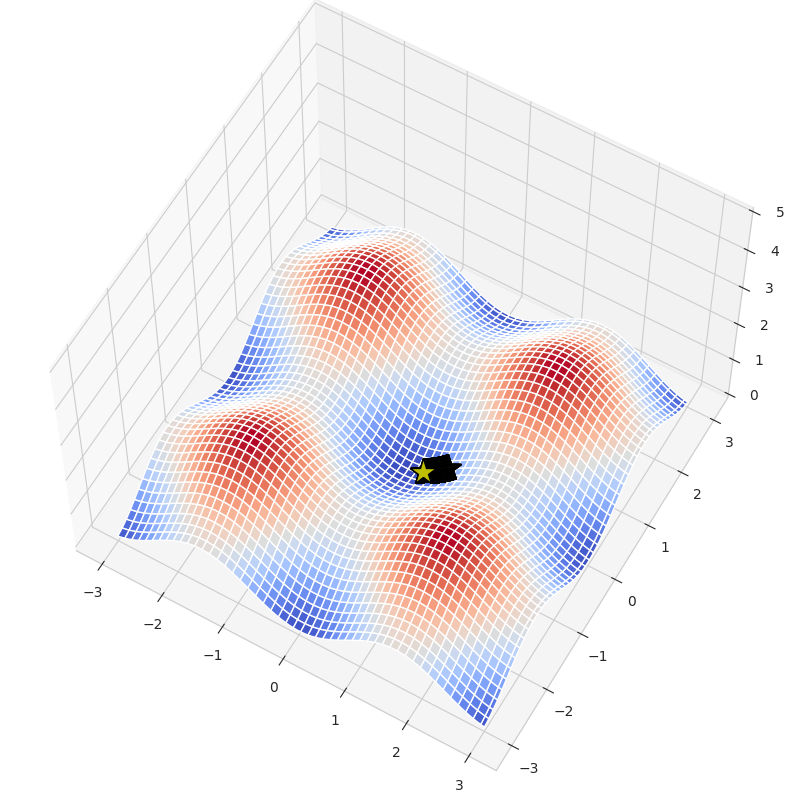

In [8]:
steps = gradient_desc_vis(f, grad_f, lr=0.005, num_iter=100)

Посмотрим на зависимость значения функции от шага градиентного спуска.

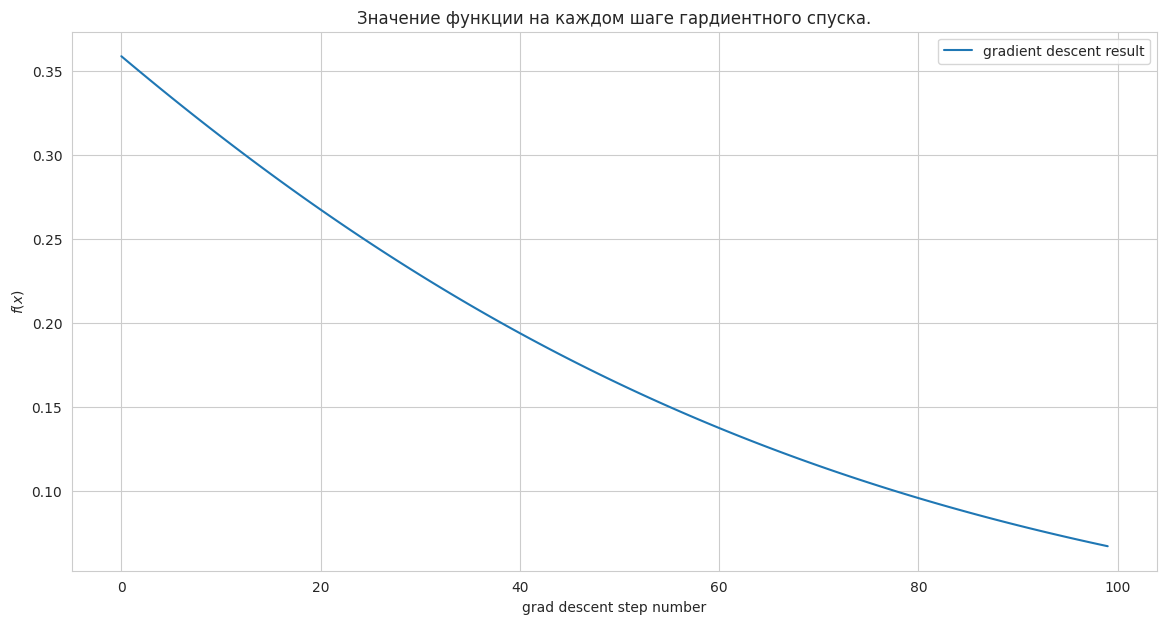

In [9]:
plt.figure(figsize=(14,7))
plt.xlabel("grad descent step number")
plt.ylabel("$f(x)$")
plt.title("Значение функции на каждом шаге гардиентного спуска.")

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label="gradient descent result")
plt.legend();

С каждым шагом градиентного спуска функция действительно уменьшает свое значение

### Задание 2. Реализация линейной регресии (суммарно 9 баллов)

Так как мы будем использовать градиентный спуск для обучения модели, важной часть является реализация функции потерь и функции для расчета ее градиента. Перем началом стоит напомнить, как считать градиент MSE. Вывод этой формулы можно найти  [здесь](https://medium.com/analytics-vidhya/linear-regression-gradient-descent-intuition-and-math-c9a8f5aeeb22)

$$
    MSE = \frac{1}{N}\sum(y_{true} - y_{pred}) ^ 2
$$

$$
    \nabla{MSE} = \frac{2}{N} X^T (y_{pred} - y_{true})
$$

Здесь имеется в виду именно матричное умножение.

In [10]:
a=np.array([[0,2,3]]*2)
a.shape[1]

3

In [11]:
a

array([[0, 2, 3],
       [0, 2, 3]])

#### Задание 2.1. MSE и ее градиент (2 балла)

In [12]:
def mse(y_true, y_pred):
    """
    Функция потерь MSE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели
        :return: значение функции потерь
    """

    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")

    return np.mean((y_true - y_pred) ** 2)


def mse_grad(y_true, y_pred, X):
    """
    Функция для расчета градиента MSE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели
        :param X: np.array[n_samples, n_features]: матрица объекты x (признаки)
        :return: градиент функции потерь MSE
    """

    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")

    return 2/X.shape[1]*X.T@(y_pred-y_true)



class MSELoss:
    """
    Класс, реализующий функцию потерь MSE. Нужен для того, чтобы
    объединять в одном месте функцию потерь и градиент для нее.
    """

    def __call__(self, y_true, y_pred):
        return mse(y_true, y_pred)

    def calculate_gradient(self, y_true, y_pred, X):
        return mse_grad(y_true, y_pred, X)

Мы будем использовать следующий класс для расчета градиента наших функций потерь:

In [13]:
class BasicGradientDescent:
    """
    Класс, позволяющий делать шаги градиентного спуска,
    а также рассчитывающих норму градиента.
    """

    def __init__(self, loss_function, grad_norm):
        self.loss = loss_function
        self.grad_norm = grad_norm


    def step(self, y, y_pred, X):
        grad_i = self.loss.calculate_gradient(y, y_pred, X)
        grad_i_norm = self._calculate_grad_norm(grad_i)

        return grad_i, grad_i_norm


    def _calculate_grad_norm(self, grad_i):
        if self.grad_norm == "l1":
            return np.abs(grad_i).sum()
        elif self.grad_norm == "l2":
            return np.sqrt(np.square(grad_i).sum())
        else:
            raise ValueError(f"I can't calculate {self.grad_norm} norm of gradient")

В данном задании нужно будет реализовать линейную регрессию и обучить ее при помощи градиентного спуска. Для этого нужно будет заполнять пропуски кода в соответствующих классах. Для начала мы реализуем базовый класс для всех линейных моделей, от которого потом будем наследоваться при реализации линейной и логистической регресий. Не переживайте, этот класс уже реализован, вам достостаточно просто разобраться с кодом.

In [14]:
class BaseLinearModel:
    """
    Класс, который представляет из себя базовую линейную модель, наследуюясь от которого, мы будем
    реализовывать линейную и логистическую регрессии.
    """

    def __init__(self, learning_rate,
                 loss_function, fit_intercept,
                 n_iter, tol, optimizer, grad_norm):
        """
        Конструктор нашего класса.
            :param learning_rate: скорость обучения
            :param loss_function: функция потерь (MSE или кросс-энтропия)
            :param fit_intercept: нужно ли нам включать свободных член в модель
            :param n_iter: количество итераций градиентного спуска
            :param tol: параметр для остановки градиентного спуска,
                        если норма градиента (l1 или l2) меньше tol, то останавливаемся
            :param optimizer: класс, который будет рассчитывать градиент и его норму
            :param grad_norm: тип нормы градиента l1 или l2
        """

        self.learning_rate = learning_rate
        self.loss = loss_function
        self.fit_intercept = fit_intercept
        self.n_iter = n_iter
        self.tol = tol
        self.grad_norm = grad_norm
        self.optimizer = optimizer(loss_function, grad_norm)

        # В начале параметры модели не заданы
        self.W = None


    def fit(self, X, y):
        """
        Метод для обучения нашей модели
            :param X: матрица объекты x признаки
            :param y: вектор значений целевой переменной
            :return: обученная модель
        """

        # Сделаем из y вектор-столбец (n_samples, 1)
        y = y.reshape(-1, 1)
        n_samples = X.shape[0]

        # Добавим колонку из 1 в матрицу X
        if self.fit_intercept:
            ones_column = np.ones((n_samples, 1))
            X_new = np.hstack((ones_column, X))

        n_features = X_new.shape[1]

        # Инициализируем веса модели
        if self.W is None:
            self.W = np.random.randn(n_features, 1)

        # Обучаем модель градиентным спуском
        for i in range(self.n_iter):
            y_pred = self.predict(X)
            grad_i, grad_i_norm = self.optimizer.step(y, y_pred, X_new)

            # Если градиент близок к 0, останавливаемся
            if grad_i_norm <= self.tol:
                return self

            else:
                self.W -= self.learning_rate * grad_i

        return self


    def predict(self, X):
        raise NotImplementedError("It is a basic class for all linear models. You should implement it for descendant class.")


    def __repr__(self):
        return "Base linear model without prediction skill :("

#### Задание 2.2. Предсказания линейной регрессии (3 балла)

Реализуйте метод `predict` у класса `CustomLinearRegression`, не забудьте про свободный член!

In [15]:
class CustomLinearRegression(BaseLinearModel):
    def __init__(self, learning_rate: float = 1e-2,
                 loss_function=MSELoss(), fit_intercept=True,
                 n_iter=1000, tol=1e-5, optimizer=BasicGradientDescent, grad_norm="l1"):

        # Если вы не проходили наследование и в частности `super`, то не страшно
        # коротко, с помощью этого мы можем вызывать методы родительского класса
        # в частности здесь мы используем метод `init`
        super().__init__(learning_rate=learning_rate,
                         loss_function=loss_function, fit_intercept=fit_intercept,
                         n_iter=n_iter, tol=tol, optimizer=optimizer, grad_norm=grad_norm)


    def predict(self, X_test):
        """
        Метод для вычисления предсказаний
            :param X_test: np.array[n_test_samples, n_features]:
                           матрица объекты x признаки (тестовый датасет)
            :return: y_pred: np.array[n_test_samples, 1]: предсказания модели
        """

        if self.W is None:
            raise NotFittedError("This CustomLinearRegression instance is not fitted yet, run fit method.")

        n_test_samples = X_test.shape[0]
        if self.fit_intercept:
            ones_column = np.ones((n_test_samples, 1))
            X_test = np.hstack((ones_column, X_test))

        """
        YOUR CODE IS HERE
        """
        return X_test@self.W



    def __repr__(self):
        return "My custom linear regression"

##### Проверим нашу реализацию на простом примере

In [16]:
X = np.random.randn(100, 1)
y = 2 * X + 5 + 0.5 * np.random.randn(100, 1)

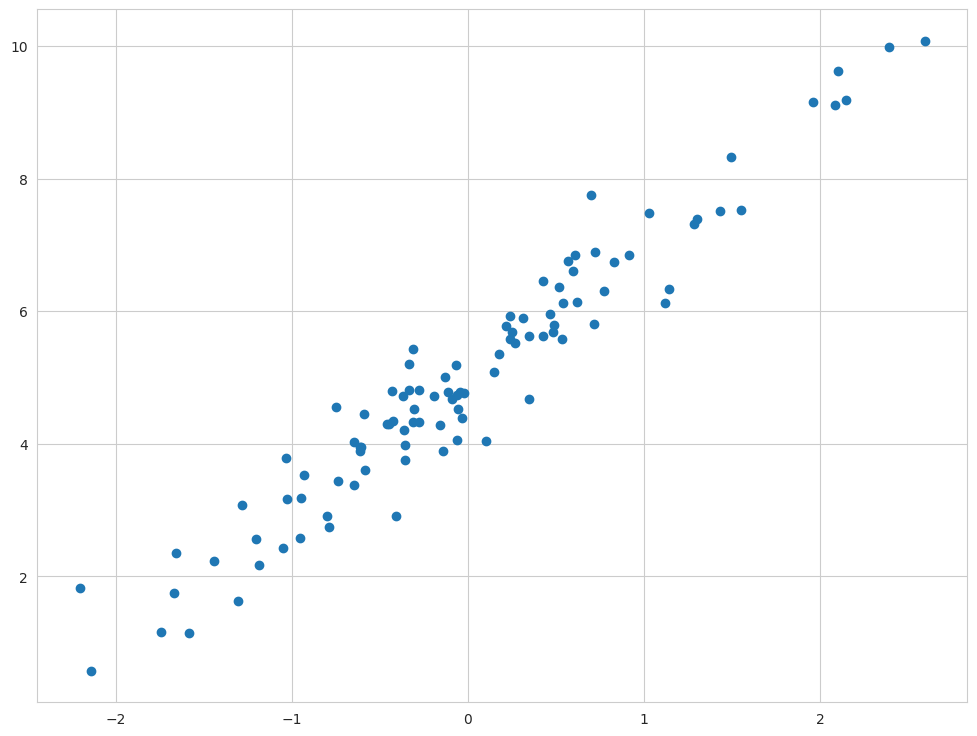

In [17]:
plt.scatter(X, y);

In [18]:
custom_lin_reg = CustomLinearRegression()

In [19]:
custom_lin_reg.fit(X, y)

My custom linear regression

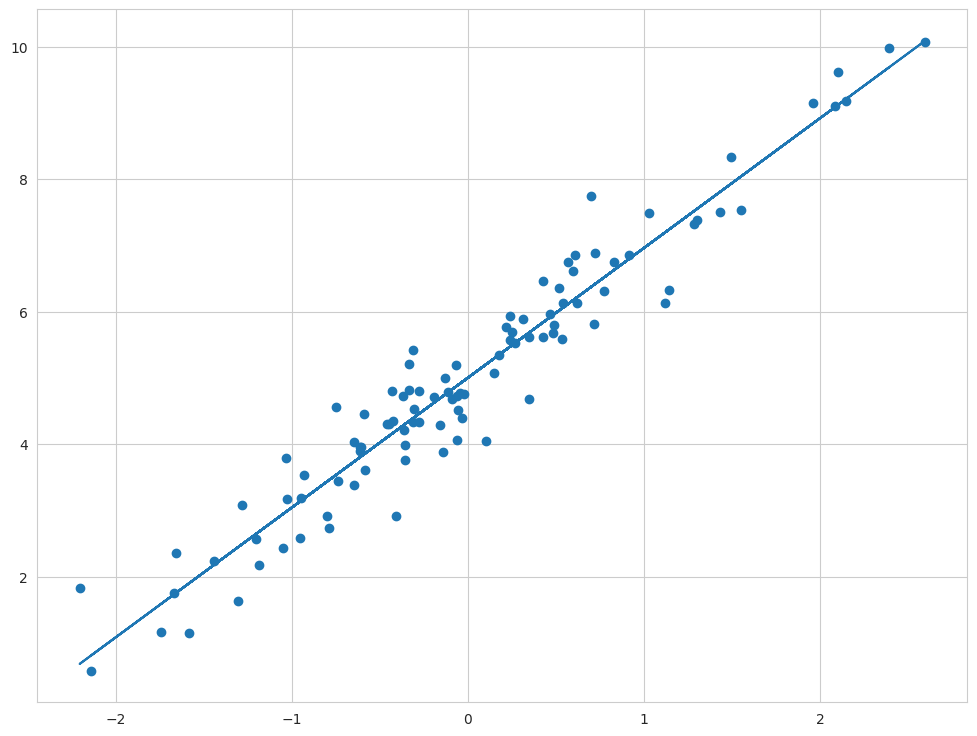

In [20]:
plt.scatter(X, y)
plt.plot(X, custom_lin_reg.predict(X));

#### Задание 2.3. Используем встроенную линейную регрессию (4 балла)

Поработаем с данными о ценах на дома в Калифорнии. Постройте модель линейной регресии при помощи `LinearRegression` из `sklearn`. Не забудьте разделить данные на тренировочную и тестовую части, а также правильно предобработать признаки. В конце воспользуйтесь какими-то изученными метриками регресии и сделайте выводы о качестве полученной модели, а также о том, какие признаки наиболее важны с точки зрения полученной модели.

In [21]:
data = fetch_california_housing() #data in json format
X, y = data["data"], data["target"]
feature_names = data["feature_names"]

Ваш ход:

In [22]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

0. MedInc   -   median income in block group

1. HouseAge   -   median house age in block group

2. AveRooms    -  average number of rooms per household

3. AveBedrms  -   average number of bedrooms per household

4. Population  -  block group population

5. AveOccup   -   average number of household members

6. Latitude

7. Longitude


In [23]:
print(f'X shape is {X.shape} and y shape is {y.shape}')

X shape is (20640, 8) and y shape is (20640,)


In [24]:
X_df = pd.DataFrame(X, columns=feature_names)
X_df['Price'] = y
X_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [25]:
X_df.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
Price          3842
dtype: int64

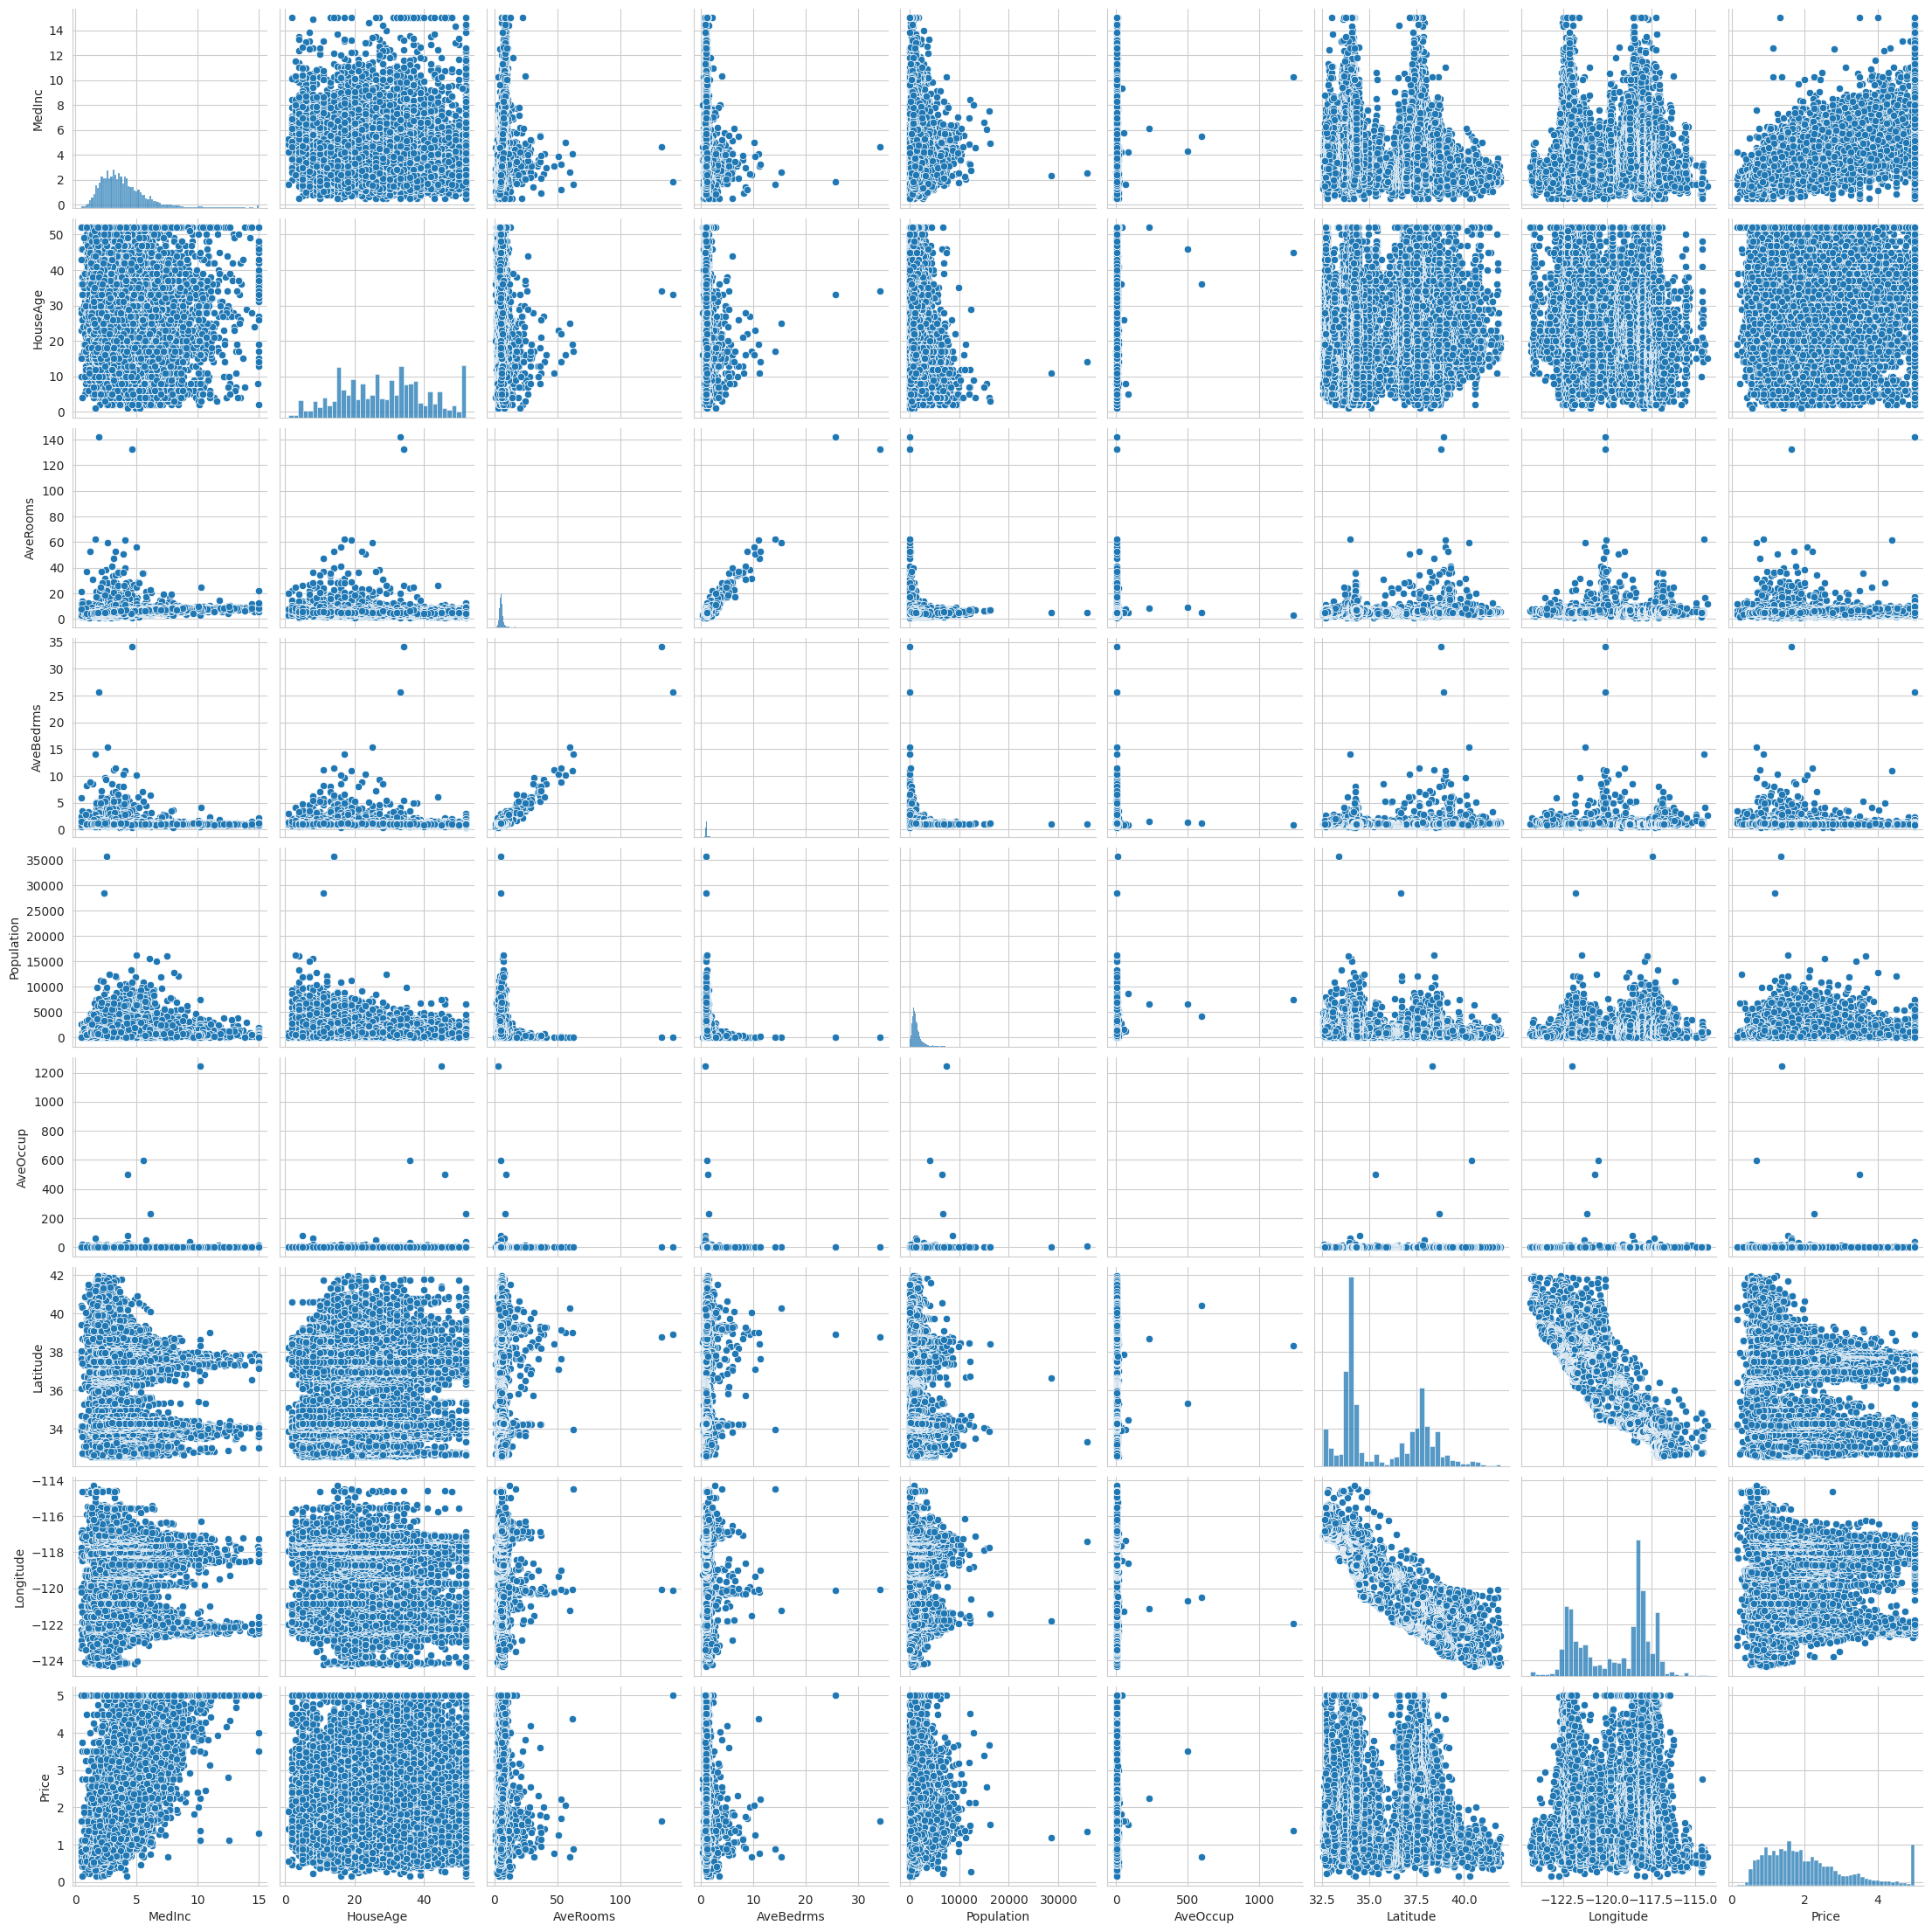

In [26]:
sns.pairplot(X_df);

In [27]:
X_df[X_df['AveRooms']>40]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
1240,3.1250,11.0,47.515152,11.181818,82.0,2.484848,38.42,-120.19,0.77500
1912,4.9750,16.0,56.269231,10.153846,54.0,2.076923,39.01,-120.16,2.06300
1913,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06,4.37500
1914,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500
2395,3.8750,23.0,50.837838,10.270270,64.0,1.729730,37.12,-119.34,1.25000
9676,3.2431,14.0,52.848214,11.410714,265.0,2.366071,37.64,-119.02,2.21400
11707,1.1912,22.0,52.690476,8.857143,98.0,2.333333,39.15,-120.06,1.70000
11832,3.0000,16.0,41.333333,8.476190,44.0,2.095238,39.30,-120.33,1.75000
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25,0.67500


In [28]:
X_df[X_df['AveOccup']>40]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000,37.89,-121.29,1.62500
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.50000
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500


Категориальных признаков нет, при это есть явная линейная зависимость между AveRooms и AveBedrms, что говорит об избыточности этих признаков. Оставлю только AveRooms для линейной регрессии

По количеству владельцев дома найдены выбросы, которые стоит удалить, так как они сильно выбиваются из общей выборки и их мало, а выборка достаточно большая и не пострадает от их удаления.

Также признаки имеют различный range, что сильно может повлиять на предсказание модели. Следовательно, стоит их нормализовать

Также стоит убрать широту или долготу, так как эти признаки прямо коррилируют между собой и присутсвие обоих может быть избыточно

In [29]:
#DELETE OUTLIERS AND COLUMN
X_df = X_df.drop(columns='AveBedrms')
# X_df = X_df.drop(columns='Latitude')
X_df = X_df[X_df['AveOccup']<40]
X_df = X_df[X_df['AveRooms']<40]

In [30]:
X_df[X_df['Price']>4.9].nunique()

MedInc         963
HouseAge        51
AveRooms      1021
Population     792
AveOccup      1014
Latitude       191
Longitude      238
Price           34
dtype: int64

In [31]:
X_df[X_df['Price']>4.9]['Price'].unique()

array([5.00001, 4.94   , 4.99   , 4.955  , 4.908  , 4.956  , 4.976  ,
       4.987  , 5.     , 4.947  , 4.984  , 4.974  , 4.912  , 4.904  ,
       4.932  , 4.986  , 4.903  , 4.922  , 4.934  , 4.925  , 4.938  ,
       4.958  , 4.954  , 4.991  , 4.93   , 4.933  , 4.964  , 4.944  ,
       4.923  , 4.929  , 4.959  , 4.96   , 4.988  , 4.92   ])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_df.drop(columns=['Price']),
                                                    X_df['Price'],
                                                    test_size=0.15,
                                                    random_state=SEED)

In [33]:
X_train

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
8921,2.7019,25.0,3.751185,983.0,2.329384,34.02,-118.48
8367,3.1194,33.0,4.195991,1518.0,3.380846,33.98,-118.35
3516,5.1619,36.0,5.202667,1040.0,2.773333,34.25,-118.48
8101,3.2778,41.0,4.500000,1053.0,3.787770,33.80,-118.21
18931,2.3929,11.0,4.912409,318.0,2.321168,38.09,-122.11
...,...,...,...,...,...,...,...
7450,2.7000,43.0,4.778947,2340.0,4.105263,33.94,-118.18
4189,3.5638,35.0,4.701456,1523.0,3.696602,34.12,-118.21
4827,1.9531,31.0,5.071264,1194.0,2.744828,34.03,-118.32
10206,7.2893,32.0,6.009780,967.0,2.364303,33.88,-117.93


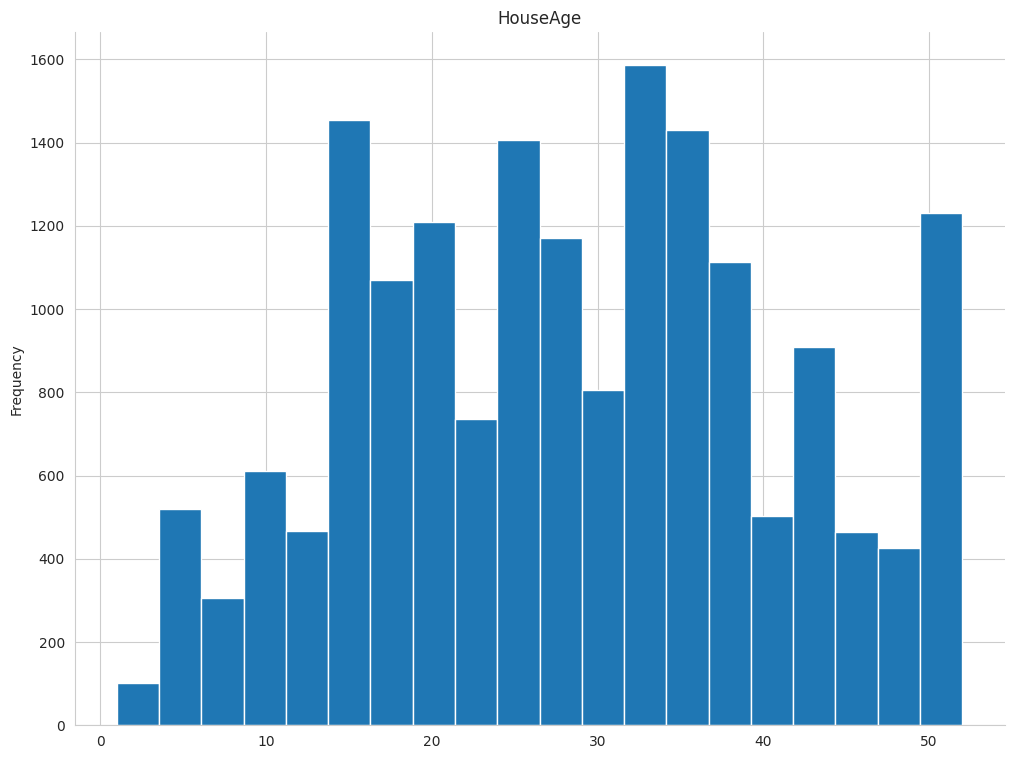

In [34]:
X_train['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [36]:
X_test_scaled = scaler.transform(X_test)

In [37]:
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
y_pred = linear_regression.predict(X_test_scaled)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

MSE: 0.5354521838054299
R^2: 0.5988719118563266


При наличии только долготы, метрики были:

MSE: 0.6338274349488552

R^2: 0.5251751792529257

Что говорит о том, что лучше оставить широту и долготу в исследуемых данных

Удивительно, что несмотря на довольно не плохой MSE (так как он может быть бесконечно большим) показатель RSE достаточно низок, что говорит о дополнительной, не объясненной моделью, дисперсии в данных. Посмотрев на графики можно понять, что дело в аномальном скачке предсказываемого параметра вблизи 5. Скорее всего, в нашем случае лучше всего удалить эти данные/предсказывать до них, так как это смещает в целом все наше предсказание в сторону более высоких цен. При этом не ясно вызван этот скачок на пятерке отдельным фактором, который можно было бы учесть или же это следствие того, что все цены выше пятерки признали равными пятерке

Возможное решение для таких выборок - удалить из трейна данные равные пяти (так как они смещают нашу выборку) и оставить эти данные в тесте (так как мы не можем отсеивать в тесте по предсказываемой переменной). Затем все что в тесте предсказалось как пять и больше - поставить 5

<ipython-input-39-a455b577688e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist = False, kde = True,
<ipython-input-39-a455b577688e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist = False, kde = True,


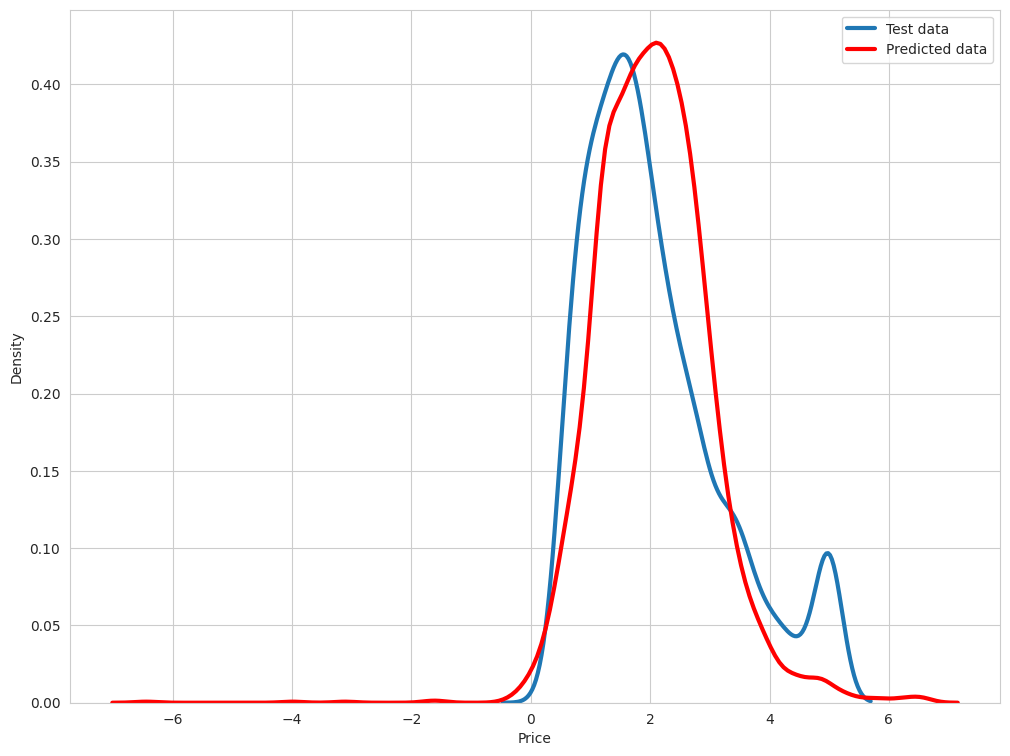

In [39]:
sns.distplot(y_test, hist = False, kde = True,
              kde_kws = {'linewidth': 3},
              label = 'Test data')
sns.distplot(y_pred, hist = False, kde = True,
              kde_kws = {'linewidth': 3},
              label = 'Predicted data', color ='red')
plt.legend(["Test data", "Predicted data"]);

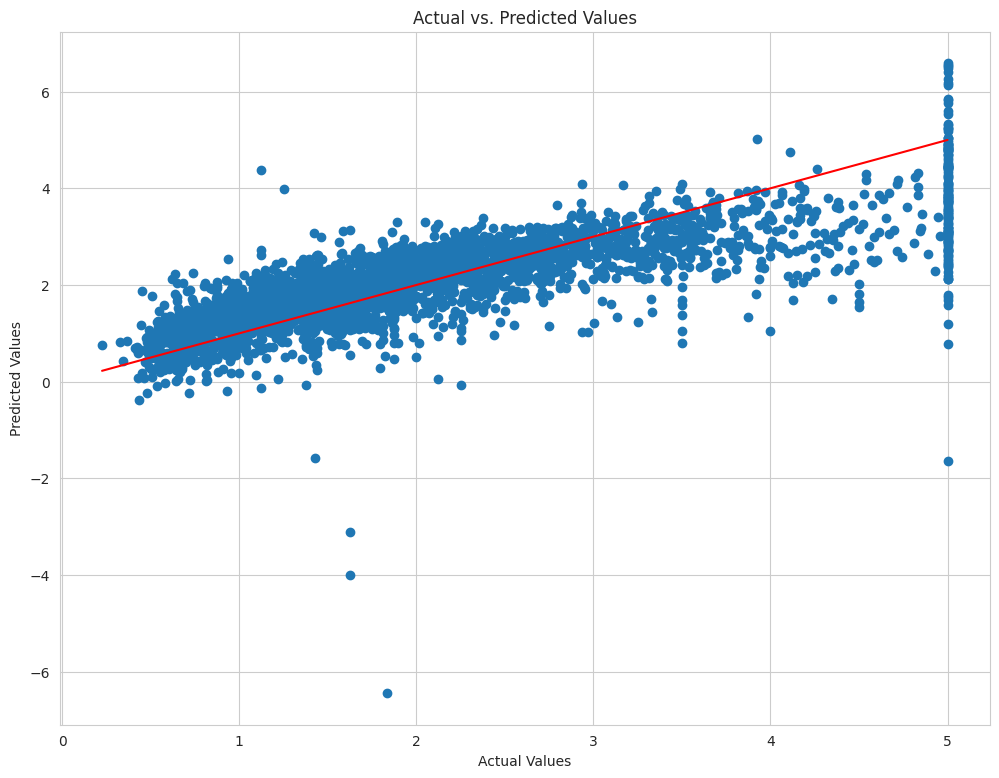

In [40]:
plt.scatter(y_test, y_pred)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()

In [41]:
coefficients = np.abs(linear_regression.coef_)
coefficients

array([0.69612955, 0.13323769, 0.02216038, 0.04028548, 0.24507687,
       0.97411911, 0.89795745])

Наибольший вклад внесли местоположение (Latitude, Longitude) и средний доход в блоке

### Задание 3. Реализация логистической регресии (суммарно 10 баллов)

Логистическая регрессия не очень сильно отличается от обычной линейной регрессии и используется в задах классификации. Так как здесь мы снова будем пользоваться градиентным спуском, то нужно определить функцию потерь и ее градиент. Одним из самых популярных вариантов в задаче бинарной классификации является бинарная кросс-энтропия (BCE).

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

где $y$ это  таргет желаемого результата и $\hat y$ является выходом модели. $\sigma$ - это [*логистическая* функция](https://en.wikipedia.org/wiki/Sigmoid_function), который преобразует действительное число $\mathbb R$ в вероятность $[0,1]$.

Единственная проблема данной функции это возможность получить 0 под знаком логарифма, что не очень хорошо. Попробуем справить с этим "в лоб". Скажем, что наши предсказания могут принимать значения от 0 + eps до 1 - eps, где eps очень маленькое число.

#### Задание 3.1. Реализация сигмоиды (0.5 баллов)

Реализуйте функцию `sigmoid`, которая переводит действительное число $\mathbb R$ в вероятность $[0,1]$.

In [42]:
def sigmoid(output):
    # output результат X@w (-inf, +inf)

    P = 1/(1+np.exp(-output))
    return P

#### Задание 3.2. BCE Loss и ее градиент (2.5 балла)

Так как мы с вами только начинаем изучать машинное обучение, то было бы слишком жестоко просить вас вычислить градиент BCE Loss (он не так сложен, просто нужно привыкнуть). Поэтому сразу напишем формулу для него:

$$
\nabla{\mathcal L_{BCE}(y, \hat y), X} = X^T (\sigma({\hat{y}}) - y)
$$

In [43]:
def bce(y_true, y_pred, eps=1e-15):
    """
    Функция потерь BCE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов 0/1
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели (вероятности)
        :return: значение функции потерь
    """

    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")

    n = y_true.shape[0]

    # So I want escape log(0)
    y_pred = np.clip(y_pred, eps, 1 - eps)

    BCE = -1/n*np.sum(np.log(sigmoid(y_pred))*y_true +
                np.log(1-sigmoid(y_pred)*(1-y_true)), axis=0)

    return BCE


def bce_grad(y_true, y_pred, X):
    """
    Функция потерь BCE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов 0/1
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели (вероятности)
        :param X: np.array[n_samples, n_features]: матрица объекты x признаки
        :return: значение функции потерь
    """

    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")

    return X.T@(sigmoid(y_pred)-y_true)


class BCELoss:
    """
    Класс, реализующий функцию потерь BCE. Нужен для того, чтобы
    объединять в одном месте функцию потерь и градиент для нее.
    """

    def __call__(self, y_true, y_pred):
        return bce(y_true, y_pred)

    def calculate_gradient(self, y_true, y_pred, X):
        return bce_grad(y_true, y_pred, X)

#### Задание 3.3. Предсказания логистической регрессии (2 балла)

Реализуйте метод `predict` у класса `CustomLogisticRegression`, не забудьте про свободный член!

In [44]:
class CustomLogisticRegression(BaseLinearModel):
    def __init__(self, learning_rate: float = 1e-3,
                 loss_function=BCELoss(), fit_intercept=True,
                 n_iter=1000, tol=1e-5, optimizer=BasicGradientDescent, grad_norm="l1"):

        super().__init__(learning_rate=learning_rate,
                         loss_function=loss_function, fit_intercept=fit_intercept,
                         n_iter=n_iter, tol=tol, optimizer=optimizer, grad_norm=grad_norm)


    def predict(self, X_test):
        if self.W is None:
            raise NotFittedError("This CustomLogisticRegression instance is not fitted, run fit method.")

        n_test_samples = X_test.shape[0]
        if self.fit_intercept:
            ones_column = np.ones((n_test_samples, 1))
            X_test = np.hstack((ones_column, X_test))


        return sigmoid(X_test@self.W)


    def __repr__(self):
        return "My custom logistic regression"

#### Снова проверим работу алгоритма на простом примере

In [45]:
# Создадим датасет из 1 признака и 2 классов
X, y = make_classification(n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1)

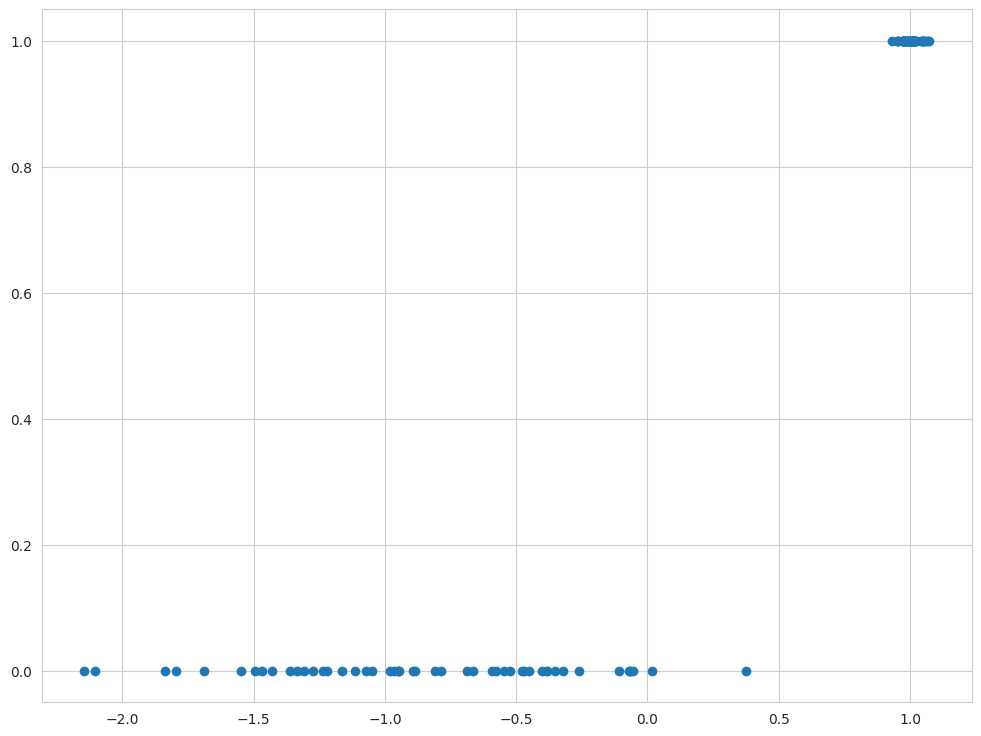

In [46]:
plt.scatter(X, y);

In [47]:
custom_log_reg = CustomLogisticRegression()
custom_log_reg.fit(X, y)
y_pred = custom_log_reg.predict(X)

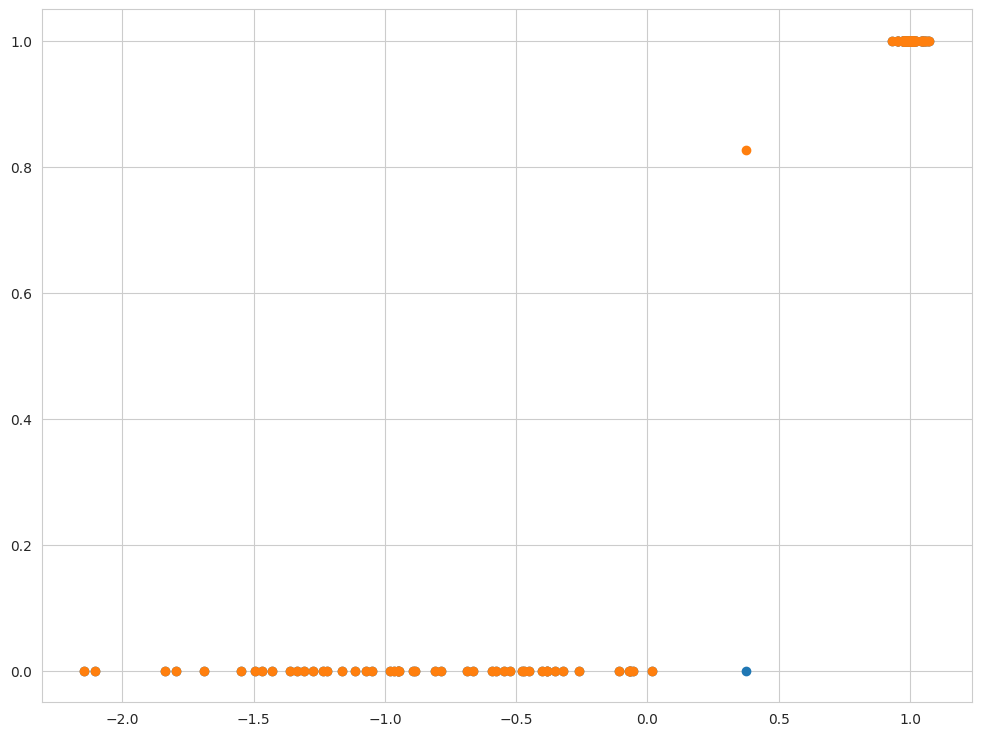

In [48]:
plt.scatter(X, y)
plt.scatter(X, y_pred); # на графике отображены вероятности

предположим, что порог 0.5 и округление простой round для сигмоиды как раз подходит для разделения на классы (выбор класса по вероятности, порог)

In [49]:
y_pred = np.round(y_pred, 0)

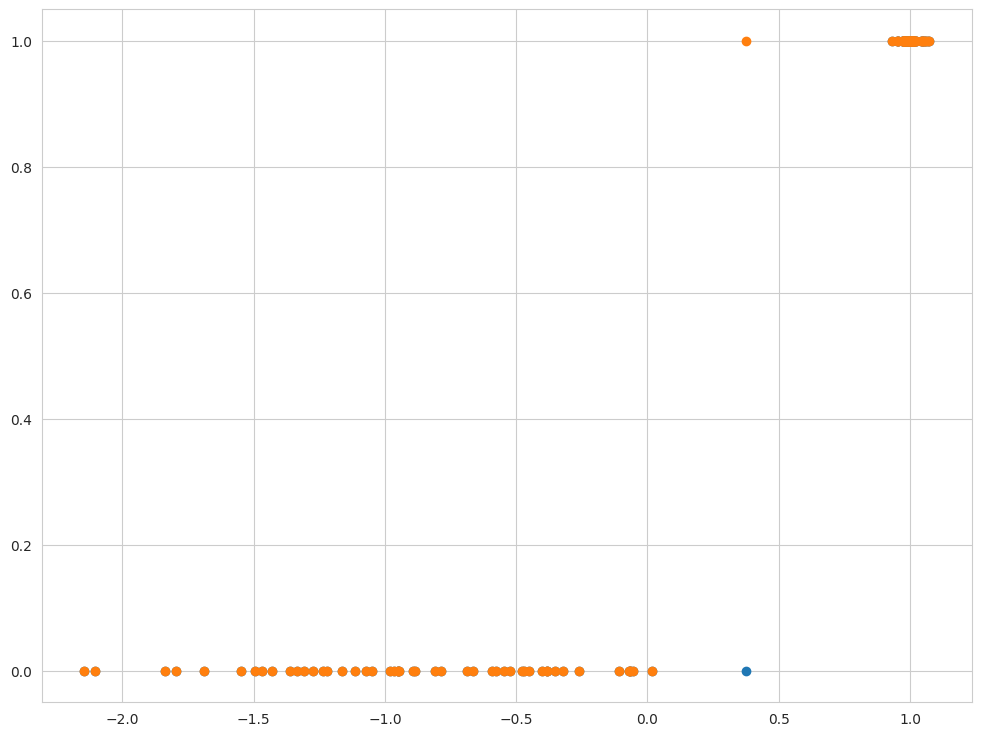

In [50]:
plt.scatter(X, y)
plt.scatter(X, y_pred); # на графике отображены предсказанные классы

Видим, что простое округление не идеально подходит, хотя и очень хорошою. Возможно, стоит рассмотреть разные пороги.

Проверьте качество работы модели при помощи известных вам метрик бинарной классификации.

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.99
Precision: 0.9803921568627451
Recall: 1.0
F1 Score: 0.99009900990099


Логичные метрики, учитывая простоту модели и отсутсвия деления на тренировочные и тестовые данные

#### Задание 3.4. Применение логистической регрессии (5 баллов)

Мы будем использовать данные по свойствам покемонов (https://www.kaggle.com/abcsds/pokemon). В данном задании вам необходимо сначала сделать краткий EDA (Посмотреть на данные и их распределения, а также посмотреть, как различные признаки связаны между собой и с целевой переменной (`Legendary`)).

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics

In [54]:
pokemon = pd.read_csv("Pokemon.csv")
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Мы будем предсказывать является ли покемон легендарным или нет. Замените логическое значение колонки на числовое (перекодировав на 0 и 1). Также подумайте, как в этом случае лучше закодировать категориальные признаки (может быть, лучше их просто выбросить?).

In [55]:
pokemon = pokemon.set_index('#', drop=True)
pokemon['Legendary'] = pokemon['Legendary'].astype(int)

In [56]:
pokemon['Name'].nunique()

800

Каждый покемон обладает униклаьным именем, эти данные надо удалить

<Axes: xlabel='Legendary', ylabel='Count'>

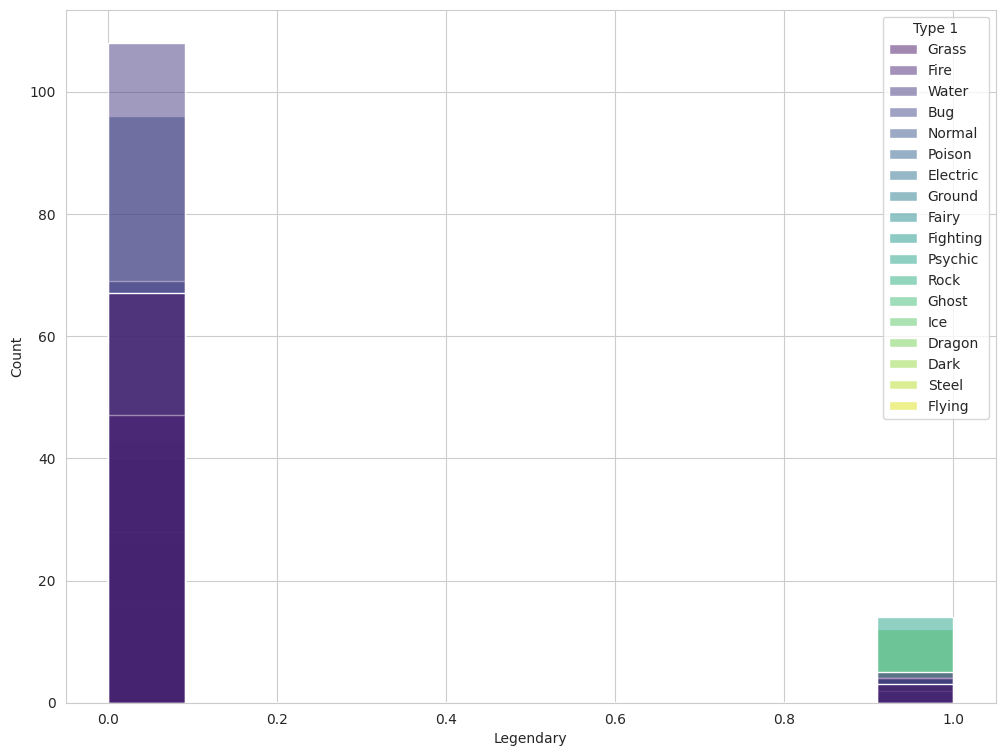

In [57]:
sns.histplot(data=pokemon, x='Legendary', hue='Type 1', palette='viridis')

<Axes: xlabel='Legendary', ylabel='Count'>

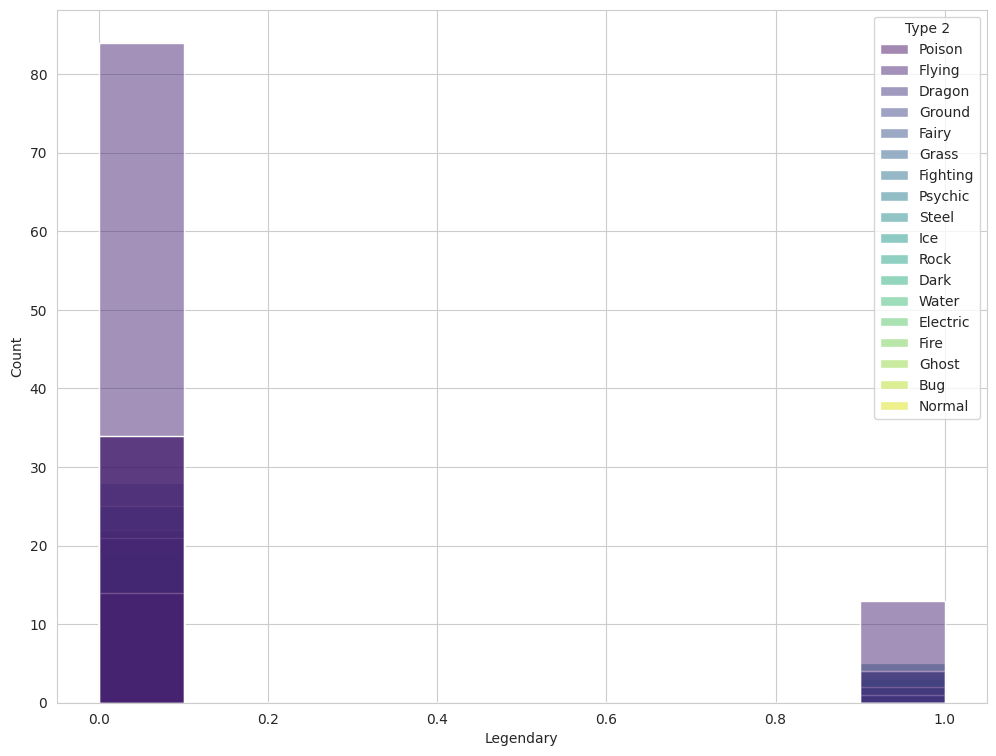

In [58]:
sns.histplot(data=pokemon, x='Legendary', hue='Type 2', palette='viridis')

Судя по гистограммам, Type 1 признак лучше оставить и переобразовать с помощью OneHotEncoder, в то время как Type 2 не сильно по-разному распределен между предсказываемым признаком и его можно убрать

Generation не является чисто категориальным признаком, так как от поколения Покемонов может заисеть и количество легендарных покемонов, кроме того, в каждый выпуск могли быть разные пропорции легендарных и нет покемонов. То есть зависимость с номером может увеличиваться или уменьшаться. Так что оставлю этот признак без трансформации OneHotEncoder

In [59]:
grouped_data = pd.DataFrame(pokemon.groupby(['Generation','Legendary'])['Total'].count().reset_index())
grouped_data['all'] = grouped_data.groupby('Generation')['Total'].transform('sum')
grouped_data['%'] = grouped_data['Total']/grouped_data['all']
grouped_data = grouped_data.drop(columns=['Total', 'all'])
grouped_data

,Generation,Legendary,%
0,1,0,0.963855
1,1,1,0.036145
2,2,0,0.952830
3,2,1,0.047170
4,3,0,0.887500
5,3,1,0.112500
6,4,0,0.892562
7,4,1,0.107438
8,5,0,0.909091
9,5,1,0.090909


In [60]:
pokemon = pokemon.drop(columns=['Name','Type 2'])
pokemon

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,
1,Grass,318,45,49,49,65,65,45,1,0
2,Grass,405,60,62,63,80,80,60,1,0
3,Grass,525,80,82,83,100,100,80,1,0
3,Grass,625,80,100,123,122,120,80,1,0
4,Fire,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
719,Rock,600,50,100,150,100,150,50,6,1
719,Rock,700,50,160,110,160,110,110,6,1
720,Psychic,600,80,110,60,150,130,70,6,1


In [61]:
numeric_features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [62]:
preprocessor = ColumnTransformer(
transformers = [
    ('Type 1 encoder', OneHotEncoder(max_categories=len(pokemon['Type 1'].unique())), ['Type 1']),
    ('numeric', StandardScaler(), numeric_features)],
    remainder='passthrough')
# я не удаляю еще одну кололнку из OneHotEncoder, так как в выборке у этого признака есть NaN и в случае удаления колонки NaN и удаленные тип будут не различимы

Разделите ваши данные на тестовую и тренировочную выборку.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(pokemon.drop(columns=['Legendary']),
                                                    pokemon['Legendary'],
                                                    test_size=0.15,
                                                    random_state=SEED,
                                                    stratify=pokemon['Legendary']) #добавила, так как сильный дисбаланс классов

Обучите модель `LogisticRegression` из `sklearn`.

In [64]:
logr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("LogRegres", LogisticRegression())
])

In [65]:
logr_pipeline.fit(X_train, y_train)
y_train_pred = logr_pipeline.predict(X_train)
y_test_pred = logr_pipeline.predict(X_test)

Выведите метрики вашего классификатора:

1. Нарисуйте [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).

2. Изобразите ROC кривую и посчитайте площадь под ней.

3. Скажите, какие признаки оказались наиболее важны для модели.

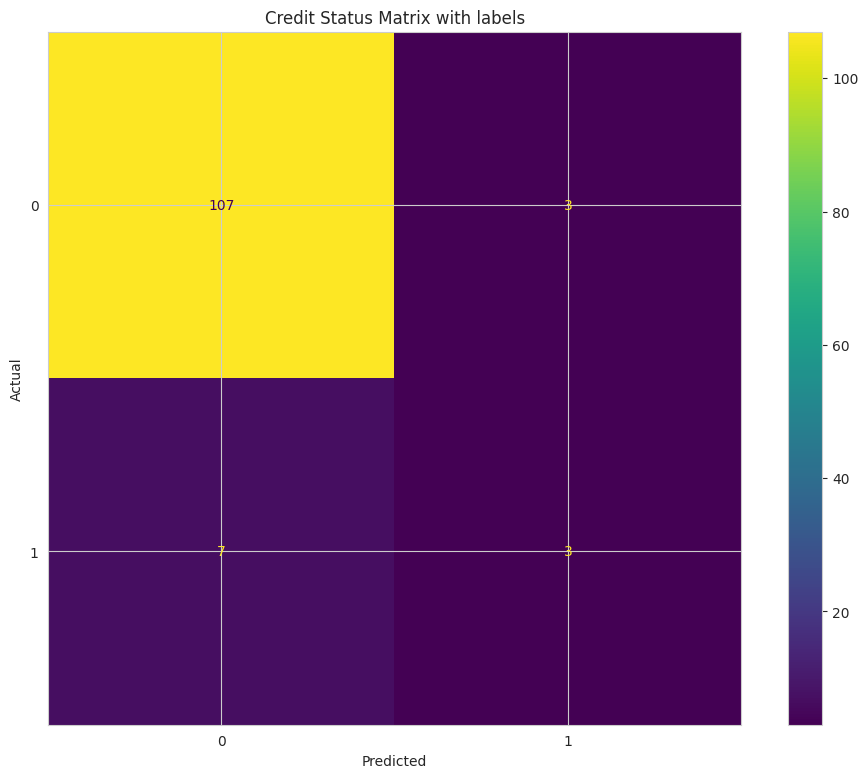

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, accuracy_score, RocCurveDisplay


cm = confusion_matrix(y_test, y_test_pred)

cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Credit Status Matrix with labels',
                xlabel='Predicted',
                ylabel='Actual')
plt.show()

In [67]:
probs = logr_pipeline.predict_proba(X_test)[:,1] #берем предсказания для 1 класса (PS np.sum(logr_pipeline.predict_proba(X_test),axis=1) даст единицы)

In [68]:
#общая точность для теста
print('Accuracy: %.2f' % (accuracy_score(y_test, y_test_pred)))
print('ROC AUC Score: %.2f' % (roc_auc_score(y_test, probs)))
#точность предсказания 0 класса
print('accuracy 0: %.2f' % (cm[0][0]/(cm[0][0] + cm[0][1])))
#точность предсказания 1 класса
print('accuracy 1: %.2f' % (cm[1][1]/(cm[1][0] + cm[1][1])))

Accuracy: 0.92
ROC AUC Score: 0.94
accuracy 0: 0.97
accuracy 1: 0.30


In [69]:
train_probs = logr_pipeline.predict_proba(X_train)[:,1]

In [70]:
print('Accuracy: %.2f' % (accuracy_score(y_train, y_train_pred)))
print('ROC AUC Score: %.2f' % (roc_auc_score(y_train, train_probs)))
print('accuracy 0: %.2f' % (cm[0][0]/(cm[0][0] + cm[0][1])))
print('accuracy 1: %.2f' % (cm[1][1]/(cm[1][0] + cm[1][1])))


Accuracy: 0.96
ROC AUC Score: 0.99
accuracy 0: 0.97
accuracy 1: 0.30


In [71]:
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred)
# auc = metrics.roc_auc_score(y_test, y_test_pred)
# # print("False positive rate:", fpr) #низкий - хорошо
# # print("True positive rate:", tpr) #высокий - хорошо

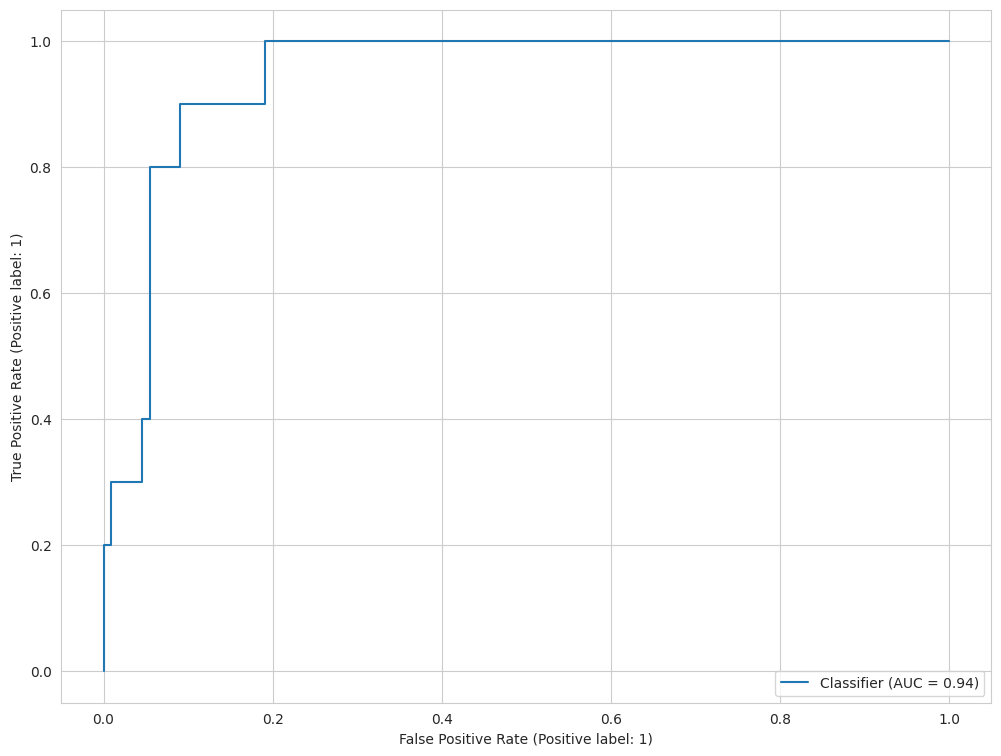

In [72]:
RocCurveDisplay.from_predictions(y_test, probs)

In [73]:
for i in range(0, len(logr_pipeline['preprocessor'].get_feature_names_out())):
  print(logr_pipeline['LogRegres'].coef_[0][i], logr_pipeline['preprocessor'].get_feature_names_out()[i])

-0.5778122521563643 Type 1 encoder__Type 1_Bug
-0.1745990567166756 Type 1 encoder__Type 1_Dark
-0.373458229980236 Type 1 encoder__Type 1_Dragon
0.894329856640664 Type 1 encoder__Type 1_Electric
-0.3322565687544384 Type 1 encoder__Type 1_Fairy
-0.37673911824937384 Type 1 encoder__Type 1_Fighting
0.6349527653772913 Type 1 encoder__Type 1_Fire
-0.24847932670147466 Type 1 encoder__Type 1_Ghost
-0.18014812726182078 Type 1 encoder__Type 1_Grass
0.8406448680813778 Type 1 encoder__Type 1_Ground
0.6330901921390268 Type 1 encoder__Type 1_Ice
-1.0247473546965964 Type 1 encoder__Type 1_Normal
-0.07691441604071268 Type 1 encoder__Type 1_Poison
0.9062350341200033 Type 1 encoder__Type 1_Psychic
-0.3704299198614458 Type 1 encoder__Type 1_Rock
0.5557549039785544 Type 1 encoder__Type 1_Steel
-0.5248656519688734 Type 1 encoder__Type 1_Water
-0.20539686238987898 Type 1 encoder__Type 1_infrequent_sklearn
1.183930108002481 numeric__Total
0.9783365665556858 numeric__HP
0.35532960949422826 numeric__Attack
0.6

Наиболее учитываемые моделью факторы:
* 1.18 Total
* 0.98 HP
* 1.01 Sp. Def
* 1.20 Speed

Менее значимые факторы, но тоже привносящие важный вклад в модель относятся как раз к Type 1
* 0.89 Type 1 encoder__Type 1_Electric
* 0.84 Type 1 encoder__Type 1_Ground
* 0.91 Type 1 encoder__Type 1_Psychic


Из-за большого дисбаланса классов модель работает не очень хорошо для предсказания легендарного класса:( Возможно, ему стоит придать большее значение и изменить порог

In [74]:
custom_threshold = 0.2
probs = logr_pipeline.predict_proba(X_test)[:,1]
probs = (probs >= custom_threshold).astype(int)


In [75]:
probs

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

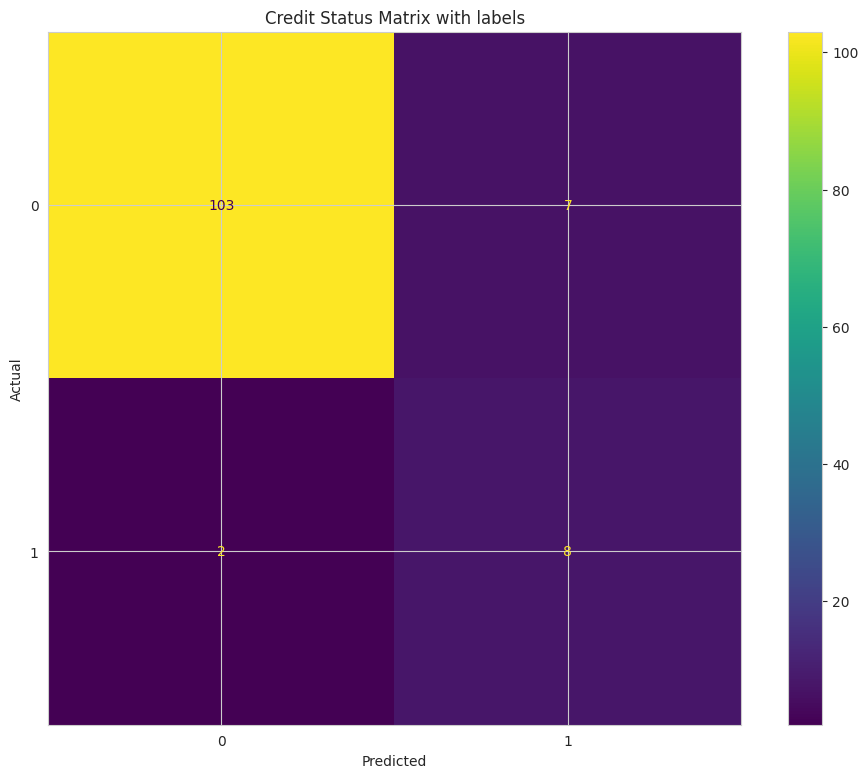

In [76]:
cm = confusion_matrix(y_test, probs)

cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Credit Status Matrix with labels',
                xlabel='Predicted',
                ylabel='Actual')
plt.show()

In [77]:
#точность предсказания 0 класса
print('accuracy 0: %.2f' % (cm[0][0]/(cm[0][0] + cm[0][1])))
#точность предсказания 1 класса
print('accuracy 1: %.2f' % (cm[1][1]/(cm[1][0] + cm[1][1])))

accuracy 0: 0.94
accuracy 1: 0.80


Точность для первого класса правда стала больше, в то время как точность предсказания нулевого класса упала не сильно. Кажется, удалось найти довольно хороший порог!

### Задание 4. Расскажите о вашей любимой музыкальной группе (исполнителе) (0.5 балла)

Расскажите, как вы познакомились с этой группой и скиньте несколько наиболее любимых треков)

Мне очень нравится AnnenMayKantereit. Кажется, ещё в школе мне показала их подруга, у них очень нравится [Vielleicht Vielleicht ](https://www.youtube.com/watch?v=kjFAlDksz5A&ab_channel=AnnenMayKantereit), [Barfuss am Klavier](https://www.youtube.com/watch?v=tERRFWuYG48&ab_channel=AnnenMayKantereit)

с woodkid познакомилась где-то в 2012 году, в лагере дал послушать друг. У него, конечно, лучшие это [Run Boy, Run](https://www.youtube.com/watch?v=lmc21V-zBq0&ab_channel=WOODKID) и [I love you](https://www.youtube.com/watch?v=KQu8FOjJXdI&ab_channel=WoodkidVEVO). У него еще очень красивые клипы)

## Therapy time

Напишите здесь ваши впечатления о задании: было ли интересно, было ли слишком легко или наоборот сложно и тд. Также сюда можно написать свои идеи по улучшению заданий, а также предложить данные, на основе которых вы бы хотели построить следующие дз.

**Ваши мысли:**

Было бы круто на предыдущем семинае разобрать как менять порог для регрессии в sklearn! Или тут добавить такое в дз, я просто из интереса решила подобрать - но, кажется, вещь полезная и потом явно пригодится)

ДЗ сильно проще первого)

PS очень хотелось бы разобрать best practice по отбору признаков и по исследованию важности коэффициентов для модели